In [ ]:
#many times you have a full cycle pipeline, esp in iot and reinforcement learning you have information being sent back, sensor 
#responds back. 

In [3]:
import requests as rq
import json

In [4]:
response = rq.get('http://api.open-notify.org/iss-now.json')

In [5]:
print(response.status_code)

200


In [6]:
print(response)

<Response [200]>


In [8]:
parameters = {"lat": 40.71, "lon": -74}

In [9]:
response = rq.get('http://api.open-notify.org/iss-now.json')

In [10]:
print(response.content)#b is a unicode 

b'{"message": "success", "iss_position": {"longitude": "-6.6222", "latitude": "8.8816"}, "timestamp": 1563900650}'


In [11]:
#-------
import json
fast_food = ['Michey Dees', 'BK', 'Taco Bell']

In [12]:
type(fast_food)

list

In [13]:
fast_food_string = json.dumps(fast_food)
type(fast_food_string)

str

In [14]:
print(type(json.loads(fast_food_string)))#dump comes out as string, load string back up comes back a list like a label encoder

<class 'list'>


In [15]:
food_francise_string = json.dumps(fast_food_franchise)
print(type(fast_food_franchise_string))#

#json comes back and becomes a string

NameError: name 'fast_food_franchise' is not defined

In [17]:
#formatting strings and date and time always needed when dealing with apis
import requests as rq
import json
import datetime
import pytz#python datetime

In [28]:
response = rq.get("http://api.weatherbit.io/v2.0/current?city=NewYork,NY&key=")
print(response.status_code)#returns 200 then is valid


204


In [32]:
#use python timezone to grab what the timezone is from server, otherwise server and you could be in different timezones
utc_now = pytz.utc.localize(datetime.datetime.utcnow())
currentDT = utc_now.astimezone(pytz.timezone("America/NewYork"))

#set month, date, our going forward
Month = currentDT.month
Day = currentDT.day
Hour = currentDT.hour

UnknownTimeZoneError: 'America/NewYork'

In [30]:
# drop things into json linter to be able to read it better
# https://jsonlint.com/

data = response.json()
print(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [25]:
print(data['data'][0]['solar_rad'])#after looking at raw json identify name to top hierarchy you want, then reference by keys

940.8


In [26]:
current_solar_rad = data['data'][0]['solar_rad']

In [27]:
print(data['data'][1])

IndexError: list index out of range

In [8]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [28]:
#------
import tweepy as tw
import pandas as pd

consumer_key=''
consumer_secret=''
access_token='' 
access_token_secret=''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

RT @edd: As we head to @TensorFlow 2.0, you'll be aware that tf.contrib is going away. This article introduces SIG Addons, the community-le…
RT @howiebaik: #rstats Blog Post: 
Independent Learning from Tidy Tuesday Screencast Part 3

Learn about a few text mining tips, network gr…
Hey data science folks, I'm curious: which better describes the way you do data science?

1⃣  Use existing data to… https://t.co/xQylrJYjCO
RT @KameronHurley: The replies to this tweet from actual Dutch folks are A+ https://t.co/TBJBW2DkPi
on the dog walk i noticed that half of the hoods is still w/o power so pretty much every house now is running a generator
#gansInTheWild 😔
@sxywu @DataToViz This looks amazing it's like a living classical Chinese landscape painting.
RT @iraphas13: My 1st @GoogleAI Residency paper is finally on arxiv!

We train a powerful generative model of fonts as SVG instead of pixel…
RT @Literature_Geek: Some things that will be available to take in the #ACH2019 Quiet Room tomorrow: pil

In [29]:
search_words = "#wildfires"
date_since = "2018-11-16"

In [30]:
#use .Cursor() to search twitter for tweets containing the search term #wildfires. You can restrict the number of tweets 
# returned by specifying a number in the .items() method. .items(5) will return 5 of the most recent tweets.
tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since).items(5)
tweets
# Cursor() returns an object that you can iterate or loop over to access the data collected. Each item in the iterator 
# has various attributes that you can access to get information about each tweet including:

# the text of the tweet
# who sent the tweet
# the date the tweet was sent
# and more. The code below loops through the object and prints the text associated with each tweet.

In [32]:
# Collect tweets
#loops through the object and prints the text associated with each tweet.
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)

# Iterate on tweets
for tweet in tweets:
    print(tweet.text)
# 2/2 provide forest products to local mills, provide jobs to local communities, and improve the ecological health of… https://t.co/XemzXvyPyX
# 1/2 Obama's Forest Service Chief in 2015 --&gt;"Treating these acres through commercial thinning, hazardous fuels remo… https://t.co/01obvjezQW
# RT @EnviroEdgeNews: US-#Volunteers care for abandoned #pets found in #California #wildfires; #Dogs, #cats, [#horses], livestock get care an…
# RT @FairWarningNews: The wildfires that ravaged CA have been contained, but the health impacts from the resulting air pollution will be sev…
# RT @chiarabtownley: If you know anybody who has been affected by the wildfires, please refer them to @awarenow_io It is one of the companie…

RT @m_parrington: I think it's fair to say July Arctic Circle #wildfires are now at unprecedented levels having surpassed previous highest…
Governor @dougducey has declared a state of emergency in Coconino County in light of the #MuseumFire. #cronkitenews… https://t.co/YZ1yeRV2ng
RT @MerlinofCanada: Huge swathes of the Arctic on fire, ‘unprecedented’ satellite images show
#WildFires
@jkenney @AndrewScheer
@fordnation…
RT @MerlinofCanada: Huge swathes of the Arctic on fire, ‘unprecedented’ satellite images show
#WildFires
@jkenney @AndrewScheer
@fordnation…
RT @MerlinofCanada: Huge swathes of the Arctic on fire, ‘unprecedented’ satellite images show
#WildFires
@jkenney @AndrewScheer
@fordnation…


In [35]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]
# ['2/2 provide forest products to local mills, provide jobs to local communities, and improve the ecological health of… https://t.co/XemzXvyPyX',
#  '1/2 Obama\'s Forest Service Chief in 2015 --&gt;"Treating these acres through commercial thinning, hazardous fuels remo… https://t.co/01obvjezQW',
#  'RT @EnviroEdgeNews: US-#Volunteers care for abandoned #pets found in #California #wildfires; #Dogs, #cats, [#horses], livestock get care an…',
#  'RT @FairWarningNews: The wildfires that ravaged CA have been contained, but the health impacts from the resulting air pollution will be sev…',
#  'RT @chiarabtownley: If you know anybody who has been affected by the wildfires, please refer them to @awarenow_io It is one of the companie…']

['RT @AthenaisRK: Selected paintings are on sale for a limited time only @ Anaïs Art Shoppe!\nhttps://t.co/D2SbsIsXKV\n#painting #waterfalls #T…',
 'The Arctic is on fire. It is undeniable the unprecedented scale of these #wildfires is a direct result of the clima… https://t.co/oaZebkJtoG',
 "RT @m_parrington: I think it's fair to say July Arctic Circle #wildfires are now at unprecedented levels having surpassed previous highest…",
 'RT @MerlinofCanada: Huge swathes of the Arctic on fire, ‘unprecedented’ satellite images show\n#WildFires\n@jkenney @AndrewScheer\n@fordnation…',
 'RT @MerlinofCanada: Huge swathes of the Arctic on fire, ‘unprecedented’ satellite images show\n#WildFires\n@jkenney @AndrewScheer\n@fordnation…']

In [34]:
new_search = search_words + " -filter:retweets"
new_search

tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]
# ['2/2 provide forest products to local mills, provide jobs to local communities, and improve the ecological health of… https://t.co/XemzXvyPyX',
#  '1/2 Obama\'s Forest Service Chief in 2015 --&gt;"Treating these acres through commercial thinning, hazardous fuels remo… https://t.co/01obvjezQW',
#  '"Start packing up!" Video shows how gender-reveal stunt sparked wildfire https://t.co/gvfNLI8NbO #Heatwave #Wildfires',
#  'The pictures and stories coming out of the California #wildfires are heartbreaking, but there are plenty of good st… https://t.co/s4D7JB3VGu',
#  'The wildfires that ravaged CA have been contained, but the health impacts from the resulting air pollution will be… https://t.co/bSdg9uHkqH']

['2/2 provide forest products to local mills, provide jobs to local communities, and improve the ecological health of… https://t.co/XemzXvyPyX',
 '1/2 Obama\'s Forest Service Chief in 2015 --&gt;"Treating these acres through commercial thinning, hazardous fuels remo… https://t.co/01obvjezQW',
 '"Start packing up!" Video shows how gender-reveal stunt sparked wildfire https://t.co/gvfNLI8NbO #Heatwave #Wildfires',
 'The pictures and stories coming out of the California #wildfires are heartbreaking, but there are plenty of good st… https://t.co/s4D7JB3VGu',
 'The wildfires that ravaged CA have been contained, but the health impacts from the resulting air pollution will be… https://t.co/bSdg9uHkqH']

In [36]:
# tweet.user.screen_name provides the user’s twitter handle associated with each tweet.
# tweet.user.location provides the user’s provided location.
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)


users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs
# [['TamaraHinton', 'Washington, DC'],
#  ['TamaraHinton', 'Washington, DC'],
#  ['robinsnewswire', "RT's Are FYI Purposes Only"],
#  ['PublicityErika', 'Seattle area'],
#  ['FairWarningNews', 'Los Angeles']]

[['350Canada', 'Canada'],
 ['defjon5', 'Portland, OR'],
 ['RachelNiaHager', 'Logan, UT'],
 ['robinsnewswire', "RT's Are FYI Purposes Only"],
 ['ISABELLAINSURED', 'Claremont California ']]

In [37]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,350Canada,Canada
1,defjon5,"Portland, OR"
2,RachelNiaHager,"Logan, UT"
3,robinsnewswire,RT's Are FYI Purposes Only
4,ISABELLAINSURED,Claremont California


In [38]:
# if you search for climate+change, Twitter will return all tweets that contain both of those words (in a row) in each tweet.

# Note that the code below creates a list that can be queried using Python indexing to return the first five tweets.

new_search = "climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
# ['“But as climate change is happening in real time, the practice of climate science...has never been at greater risk.… https://t.co/hIo1VtDnfW',
#  '“Climate Change isn’t real.” https://t.co/hzY4vQ09xM',
#  'BBC News - Climate change: CO2 emissions rising for first time in four years https://t.co/cxrzCQmmml',
#  "Ooh LOL. Anderson Cooper - giving Trump's ignorance a whipping. https://t.co/wbivZx8YHX",
#  '#NCA2018 makes it abundantly clear: the U.S. must do more to limit carbon emissions and combat the effects of clima… https://t.co/Xc81JouHQb']

["Future Timeline Iceland: A letter to the future: Iceland's first glacier lost to climate change will be remembered… https://t.co/0C1bLU64Am",
 '@ClaytonDuggan1 @TheDisproof @Matt_Clough @FrankLasCPA @MikeH_MapleGrov @nicolasDenver @MannockDavid @wlbeeton… https://t.co/zHb3X8ZM1F',
 "Animals' body sizes shrinking from climate change, study finds\n\n#climatechange #ActOnClimate #ClimateEmergency via… https://t.co/l1VGrxYYRP",
 "'Climate change is putting even resilient and adaptable animals like baboons at risk'\nhttps://t.co/bNdADURjAa via… https://t.co/m04ZqefH9e",
 'Big businesses who don’t want to be held responsible hire pseudo scientists to say we can’t “prove or disprove” cli… https://t.co/kPuUVi71i3']

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [41]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [42]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]
# ['How #Climate Change Scientists Are Learning To Get Their Message Across ... #Communications  #Science via @forbes https://t.co/NnsBYZRDNg',
#  '@Obikonobe @LesIsMore1 @Bruce_Winter @JackieForrest @PTertzakian @RachelNotley Facts do not require your belief to… https://t.co/7L6o5DiVsA',
#  "Here's How Much #Climate Change Could Cost the U.S. https://t.co/5KtsvZYCEY via @sciam",
#  'The UN’s #CLIMATE Change Conference is Meeting…in Poland’s #COAL Country https://t.co/Y8Wt4CTSda #GPWX #GlobalWarming #climatechange',
#  '"..and it highlights how the govt’s current abomination of a #climate change policy is not just hopelessly damaged… https://t.co/6h8kBcI5Tq']

['This is promising: the US Federal Reserve Bank will hold its first ever event on #climate, in San Francisco...the w… https://t.co/sYFVZNvazU',
 "77% of the world's cities will experience a striking change in climate, according to scientists.\n\nBy 2050, Paris wi… https://t.co/gZFQfipTKU",
 'Climate warning as global #CO2 levels rise to highest point in millions of years https://t.co/xHfQyw1TtZ\nThree dèca… https://t.co/5EdSuaILbp',
 'Hong Kong’s #Disneyland Resort aims to become city’s biggest producer of solar power by 2019 in bid to tackle… https://t.co/FE0k6H67uc',
 '#Climate Change causes Islands to disappear https://t.co/F4FhVqbYtf #climatechange']

In [43]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [44]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]
# ['How Climate Change Scientists Are Learning To Get Their Message Across Communications Science via forbes',
#  'Obikonobe LesIsMore1 BruceWinter JackieForrest PTertzakian RachelNotley Facts do not require your belief to',
#  'Heres How Much Climate Change Could Cost the US via sciam',
#  'The UNs CLIMATE Change Conference is Meetingin Polands COAL Country GPWX GlobalWarming climatechange',
#  'and it highlights how the govts current abomination of a climate change policy is not just hopelessly damaged']

['This is promising the US Federal Reserve Bank will hold its first ever event on climate in San Franciscothe w',
 '77 of the worlds cities will experience a striking change in climate according to scientistsBy 2050 Paris wi',
 'Climate warning as global CO2 levels rise to highest point in millions of years Three dca',
 'Hong Kongs Disneyland Resort aims to become citys biggest producer of solar power by 2019 in bid to tackle',
 'Climate Change causes Islands to disappear climatechange']

In [45]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)
# {',', 'Dog', 'cat', 'dog'}

{',', 'Dog', 'cat', 'dog'}

In [47]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case
# ['dog', 'dog', 'dog', 'cat', 'cat', ',']

['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [ ]:
# Now you have only unique words
set(lower_case)
{',', 'cat', 'dog'}

In [48]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()
['How',
 'Climate',
 'Change',
 'Scientists',
 'Are',
 'Learning',
 'To',
 'Get',
 'Their',
 'Message',
 'Across',
 'Communications',
 'Science',
 'via',
 'forbes']

['How',
 'Climate',
 'Change',
 'Scientists',
 'Are',
 'Learning',
 'To',
 'Get',
 'Their',
 'Message',
 'Across',
 'Communications',
 'Science',
 'via',
 'forbes']

In [49]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]
[['how',
  'climate',
  'change',
  'scientists',
  'are',
  'learning',
  'to',
  'get',
  'their',
  'message',
  'across',
  'communications',
  'science',
  'via',
  'forbes'],
 ['obikonobe',
  'lesismore1',
  'brucewinter',
  'jackieforrest',
  'ptertzakian',
  'rachelnotley',
  'facts',
  'do',
  'not',
  'require',
  'your',
  'belief',
  'to']]

[['how',
  'climate',
  'change',
  'scientists',
  'are',
  'learning',
  'to',
  'get',
  'their',
  'message',
  'across',
  'communications',
  'science',
  'via',
  'forbes'],
 ['obikonobe',
  'lesismore1',
  'brucewinter',
  'jackieforrest',
  'ptertzakian',
  'rachelnotley',
  'facts',
  'do',
  'not',
  'require',
  'your',
  'belief',
  'to']]

In [50]:
# collect and clean data that you collected using Tweepy
# To get the count of how many times each word appears in the sample, you can use the built-in 
# Python library collections, which helps create a special type of a Python dictonary. 
# The collection.Counter object has a useful built-in method most_common that will return the most 
# commonly used words and the number of times that they are used.

# To begin, flatten your list, so that all words across the tweets are in one list. Note that
# you could flatten your list with another list comprehension like this: all_words = [item for 
# sublist in tweets_nsw for item in sublist]
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)
[('climate', 948),
 ('change', 655),
 ('the', 621),
 ('to', 404),
 ('of', 304),
 ('in', 243),
 ('and', 233),
 ('is', 220),
 ('on', 211),
 ('a', 201),
 ('we', 150),
 ('for', 145),
 ('are', 136),
 ('climatechange', 121),
 ('you', 82)]

[('climate', 948),
 ('change', 655),
 ('the', 621),
 ('to', 404),
 ('of', 304),
 ('in', 243),
 ('and', 233),
 ('is', 220),
 ('on', 211),
 ('a', 201),
 ('we', 150),
 ('for', 145),
 ('are', 136),
 ('climatechange', 121),
 ('you', 82)]

In [51]:
# collect and clean data that you collected using Tweepy
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,climate,855
1,the,635
2,change,590
3,to,445
4,of,347


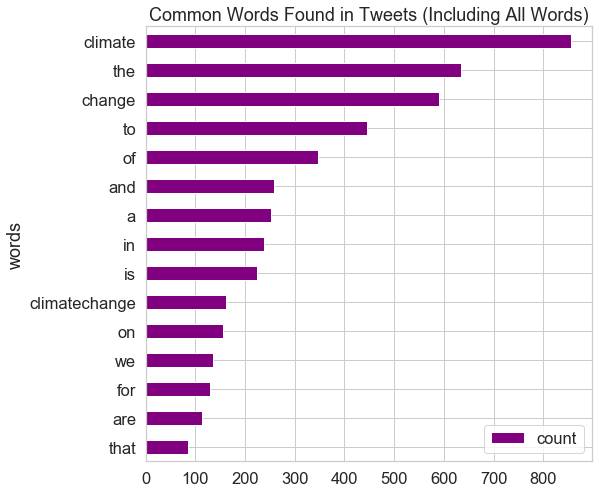

In [52]:
# collect and clean data that you collected using Tweepy
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [54]:
# collect and clean data that you collected using Tweepy
# nltk, commonly used for text analysis, provides a list of “stop words” that you can use to clean your Twitter data.
nltk.download('stopwords')
# [nltk_data] Downloading package stopwords to
# [nltk_data]     /home/jpalomino/nltk_data...
# [nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilyx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
# collect and clean data that you collected using Tweepy
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]
['wouldn',
 'our',
 'who',
 'under',
 're',
 'through',
 'down',
 'once',
 'between',
 'out']
#  stop words provided by nltk are all lower-case. This works well given you already have converted 
# all of your tweet words to lower case using the Python string method .lower().

['wouldn',
 'our',
 'who',
 'under',
 're',
 'through',
 'down',
 'once',
 'between',
 'out']

In [58]:
# collect and clean data that you collected using Tweepy
# words in the first tweet
words_in_tweet[0]
['how',
 'climate',
 'change',
 'scientists',
 'are',
 'learning',
 'to',
 'get',
 'their',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']
# you remove all of the stop words in each tweet. The list comprehension below might look 
# confusing as it is nested. The list comprehension below is the same as calling:


# compare the words in the original tweet to the words in the tweet after the stop words are removed:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]
['climate',
 'change',
 'scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']


['climate',
 'change',
 'scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']

In [59]:
# collect and clean data that you collected using Tweepy
# flatten your list and create a counter to return the most commonly used words and the number of times that they are used.
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)
[('climate', 948),
 ('change', 655),
 ('climatechange', 121),
 ('cop24', 68),
 ('via', 62),
 ('world', 61),
 ('us', 58),
 ('un', 52),
 ('amp', 47),
 ('globalwarming', 44),
 ('trump', 44),
 ('people', 41),
 ('action', 39),
 ('news', 39),
 ('gpwx', 36)]

[('climate', 948),
 ('change', 655),
 ('climatechange', 121),
 ('cop24', 68),
 ('via', 62),
 ('world', 61),
 ('us', 58),
 ('un', 52),
 ('amp', 47),
 ('globalwarming', 44),
 ('trump', 44),
 ('people', 41),
 ('action', 39),
 ('news', 39),
 ('gpwx', 36)]

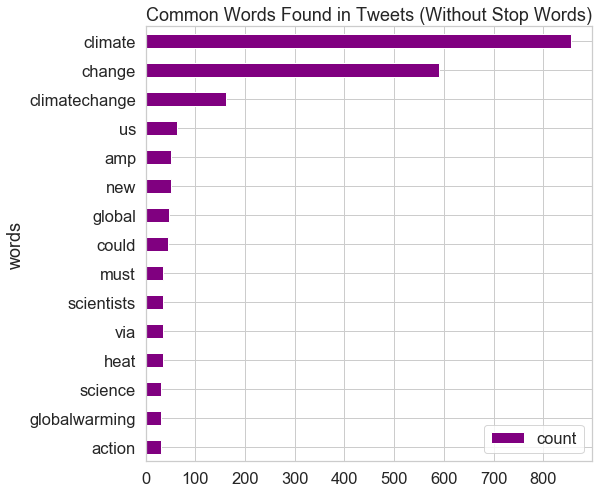

In [60]:
# collect and clean data that you collected using Tweepy
# create the Pandas Dataframe and plot the word frequencies without the stop words.
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [61]:
# collect and clean data that you collected using Tweepy
# it is common to also remove collection words. Collection words are the words that you used to query your data from Twitter.

# In this case, you used “climate change” as a collection term. Thus, you can expect that these terms will be found 
# in each tweet. This could skew your word frequency analysis.

# Below you remove the collection words - climate, change, and climatechange - from the tweets through list comprehension.
collection_words = ['climatechange', 'climate', 'change']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [62]:
# collect and clean data that you collected using Tweepy
# Compare the words in first tweet with and without the collection words.
tweets_nsw[0]
['climate',
 'change',
 'scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']

['climate',
 'change',
 'scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']

In [63]:
# collect and clean data that you collected using Tweepy
tweets_nsw_nc[0]
['scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']

['scientists',
 'learning',
 'get',
 'message',
 'across',
 'communications',
 'science',
 'via',
 'forbes']

In [64]:
# collect and clean data that you collected using Tweepy
# Now that you have cleaned up your data, you are ready to calculate and plot the final word frequency results.

# Using the skills you have learned, you can flatten the list and create the counter for the words in the tweets.
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)
[('cop24', 68),
 ('via', 62),
 ('world', 61),
 ('us', 58),
 ('un', 52),
 ('amp', 47),
 ('globalwarming', 44),
 ('trump', 44),
 ('people', 41),
 ('action', 39),
 ('news', 39),
 ('gpwx', 36),
 ('new', 36),
 ('climateaction', 34),
 ('threat', 33)]

[('cop24', 68),
 ('via', 62),
 ('world', 61),
 ('us', 58),
 ('un', 52),
 ('amp', 47),
 ('globalwarming', 44),
 ('trump', 44),
 ('people', 41),
 ('action', 39),
 ('news', 39),
 ('gpwx', 36),
 ('new', 36),
 ('climateaction', 34),
 ('threat', 33)]

In [65]:
# collect and clean data that you collected using Tweepy
# find out the number of unique words across all of the tweets, you can take the len() of the object counts that you just created.
len(counts_nsw_nc)


3527

In [66]:
# collect and clean data that you collected using Tweepy
# create the Pandas Dataframe of the words and their counts and plot the top 15 most common words from the clean 
# tweets (i.e. no URLs, stop words, or collection words).
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,us,63
1,amp,52
2,new,51
3,global,47
4,could,45


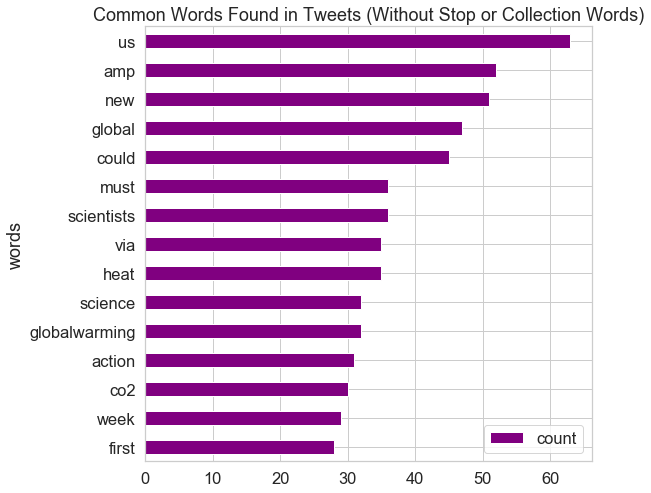

In [67]:
# collect and clean data that you collected using Tweepy
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [69]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

In [72]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ['climatechange', 'climate', 'change']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
# [nltk_data] Downloading package stopwords to
# [nltk_data]     /Users/lewa8222/nltk_data...
# [nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilyx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
#To identify co-occurrence of words in the tweets, you can use bigrams from nltk.

# Begin with a list comprehension to create a list of all bigrams (i.e. co-occurring words) in the tweets.

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]
[('science', 'links'),
 ('links', 'articles'),
 ('articles', 'science'),
 ('science', 'greenenergy'),
 ('greenenergy', 'progressive'),
 ('progressive', 'future')]

[('science', 'links'),
 ('links', 'articles'),
 ('articles', 'science'),
 ('science', 'greenenergy'),
 ('greenenergy', 'progressive'),
 ('progressive', 'future')]

In [74]:
# Original tweet without URLs
tweets_no_urls[0]
# 'science Links to articles about science and climate change climate greenenergy progressive future'

'As CLIMATE change threatens California officials seek sustainable insurance GlobalWarming climatechange'

In [75]:
# Clean tweet 
tweets_nsw_nc[0]
# ['science',
#  'links',
#  'articles',
#  'science',
#  'greenenergy',
#  'progressive',
#  'future']

['threatens',
 'california',
 'officials',
 'seek',
 'sustainable',
 'insurance',
 'globalwarming']

In [76]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

# bigram_counts.most_common(20)
# [(('live', 'cop24'), 11),
#  (('climateaction', 'climatechangeisreal'), 9),
#  (('climatechangeisreal', 'poetry'), 9),
#  (('poetry', 'poem'), 9),
#  (('key', 'scientific'), 9),
#  (('cop24', 'fails'), 9),
#  (('fails', 'adopt'), 9),
#  (('adopt', 'key'), 9),
#  (('side', 'event'), 9),
#  (('scientific', 'report'), 8),
#  (('gpwx', 'globalwarming'), 7),
#  (('32', 'trillion'), 7),
#  (('global', 'reach'), 7),
#  (('saudi', 'arabia'), 6),
#  (('global', 'warming'), 6),
#  (('investors', 'managing'), 6),
#  (('trillion', 'assets'), 6),
#  (('assets', 'call'), 6),
#  (('call', 'action'), 6),
#  (('cop24', 'unfccc'), 6)]

In [77]:
# create a Pandas Dataframe from the counter.
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(co2, levels)",23
1,"(week, azeem)",21
2,"(azeem, exponentialview)",21
3,"(exponentialview, reminds)",21
4,"(reminds, us)",21
5,"(us, co2)",21
6,"(levels, atmosphere)",21
7,"(atmosphere, must)",21
8,"(must, avoid)",21
9,"(avoid, level)",21


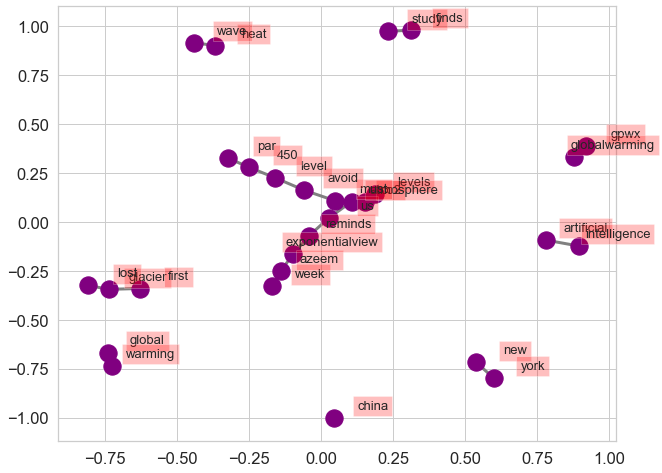

In [78]:
# Pandas Dataframe to visualize the top 20 occurring bigrams as networks using the Python package NetworkX
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
# Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. 
# It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, 
# while values closer to -1 indicate more negativity.

# In this lesson, you will apply sentiment analysis to Twitter data using the Python package textblob. 
# You will calculate a polarity value for each tweet on a given subject and then plot these values in a 
# histogram to identify the overall sentiment toward the subject of interest.

# Get and Clean Tweets Related to Climate
# Begin by reviewing how to search for and clean tweets that you will use to analyze sentiments in Twitter data.

In [82]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [84]:
# grab and clean up 1000 recent tweets. For this analysis, you only need to remove URLs from the tweets.
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [85]:
# textblob to calculate the polarity values of individual tweets on climate change.

# Begin by creating textblob objects, which assigns polarity values to the tweets. 
# You can identify the polarity value using the attribute .polarity of texblob object.
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]
(0.0,
 TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity"))

(0.0,
 TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity"))

In [86]:
# apply list comprehension to create a list of the polarity values and text for each tweet, 
#and then create a Pandas Dataframe from the list.
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]
# [0.0,
#  'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

[0.0,
 'As CLIMATE change threatens California officials seek sustainable insurance GlobalWarming climatechange']

In [87]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.000000,As CLIMATE change threatens California officia...
1,0.000000,As CLIMATE change threatens California officia...
2,0.148182,A new study says theres room for improvement i...
3,0.300000,Scientists are seeking to better understand th...
4,-0.200000,The secret to fighting climate climate could b...


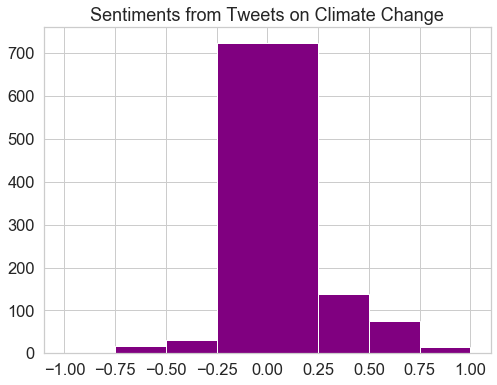

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

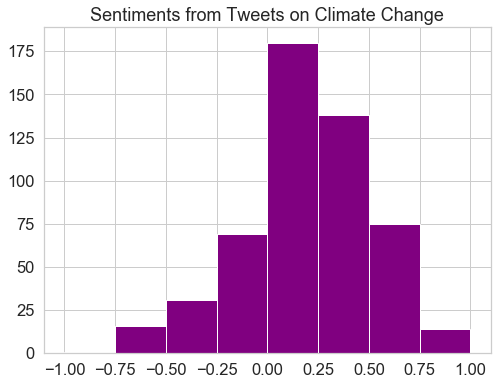

In [89]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [90]:
# What does the histogram of the polarity values tell you about sentiments in the tweets 
# gathered from the search “#climate+change -filter:retweets”? Are they more positive or negative?

# Get and Analyze Tweets Related to the Camp Fire
# Next, explore a new topic, the 2018 Camp Fire in California.

# Begin by searching for the tweets and combining the cleaning of the data (i.e. removing URLs) 
# with the creation of the textblob objects.
search_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]
# [TextBlob("Paradises evacuation notifications and protocols MTI research associate and deputy director of the National Tran"),
#  TextBlob("Missing tally in Californias CampFire down to 25hbbp ParadiseCA the whole town that burned down had 26000 ppl"),
#  TextBlob("Collecting 70000 images over 17000 acres resulting in 14 trillion pixels of data Thats what a squadron of"),
#  TextBlob("Tuxita Chiquita Lolita is a little under the weather so we did our best to cheer her up CampFire moggyblog"),
#  TextBlob("An entire homeowners insurance company is going under because of the CampFire home claims I doubt this will be th")]

[TextBlob("PGE NEEDS SHUT DOWN pge notcool campfire california highwayrobbery murderers buttecountystrong"),
 TextBlob("ButteSheriff announces new europeanstyle sirens on patrol cars for big emergencies Check out our story on how n"),
 TextBlob("VTStateParks Just spent 4 days at Elmore Lake State Park and the grandgirls didnt want to leave after hiking"),
 TextBlob("Great night to finally try the solostove and figured we should make smores while were at it cincydada campfire"),
 TextBlob("Early evening campfire chubtown campfire smores")]

In [91]:
# Pandas Dataframe of the polarity values and plot the histogram for the Camp Fire tweets, 
# just like you did for the climate change data.
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,-0.155556,PGE NEEDS SHUT DOWN pge notcool campfire calif...
1,0.068182,ButteSheriff announces new europeanstyle siren...
2,-0.100000,VTStateParks Just spent 4 days at Elmore Lake ...
3,0.400000,Great night to finally try the solostove and f...
4,0.100000,Early evening campfire chubtown campfire smores


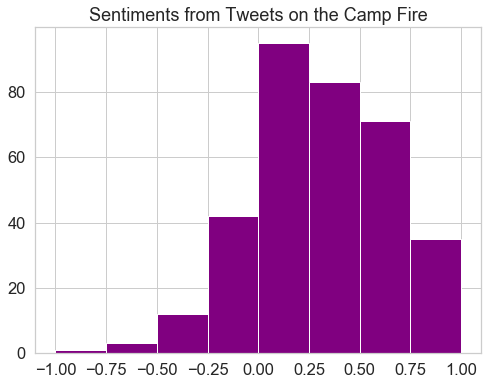

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()

In [27]:
api.update_status("Test Post from Tweepy via Jupyter Notebook")

Status(_api=<tweepy.api.API object at 0x000001FC5281FC18>, _json={'created_at': 'Tue Jul 23 21:17:07 +0000 2019', 'id': 1153776076130271232, 'id_str': '1153776076130271232', 'text': 'Test Post from Tweepy via Jupyter Notebook', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://dataAnalyticsNYC.com" rel="nofollow">lilysutest01</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 458923343, 'id_str': '458923343', 'name': 'printing_3d', 'screen_name': 'printing_3d', 'location': 'New York, NY', 'description': 'Data Scientist at Data Analytics NYC', 'url': 'https://t.co/0tcZgLqSUL', 'entities': {'url': {'urls': [{'url': 'https://t.co/0tcZgLqSUL', 'expanded_url': 'http://DataAnalyticsNYC.com', 'display_url': 'DataAnalyticsNYC.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'prote

In [13]:
pip install basilica

Note: you may need to restart the kernel to use updated packages.


In [14]:
import basilica
API_KEY = ''
with basilica.Connection('') as c:
    embeddings = c.embed_sentences(["Hello world!", "How are you?"])
    print(list(embeddings)) # [[0.8556405305862427, ...], ...]

[[-0.0871036, 0.191159, 0.10802, -0.0315596, -0.293656, -0.253189, 0.336566, 0.355509, -0.301564, -0.144623, -0.183366, -0.346495, -0.0587657, 0.290474, 0.0159103, -0.1085, -0.222062, 0.358808, 0.0427381, -0.138045, -0.236999, -0.0891719, -0.294072, -0.0726477, 0.237108, -0.201757, 0.0539317, 0.0158098, 0.15821, -0.0232017, 0.0474835, -0.0802333, 0.068703, 0.196293, -0.329178, 0.0060062, -0.275031, 0.19367, -0.269088, -0.144034, 0.0410266, -0.309351, 0.290706, 0.0160477, -0.146231, -0.238057, -1.86031, 0.174845, -0.103725, -0.346353, 0.174952, 0.194419, 0.00776276, -0.0629585, 0.086492, 0.0768937, -0.331025, 0.549338, 0.0443524, -0.0771807, -0.0823225, -0.12562, 0.208367, 0.0844908, 0.181907, -0.0349126, 0.211995, 0.484627, 0.141031, 0.464191, 0.106799, 0.03379, 0.305971, 0.0382426, -0.120836, -0.355927, 0.0513712, 0.115006, -0.262441, 0.0421158, -0.0957353, -0.0601781, 0.113219, 0.162798, -0.0119647, 0.0780434, 0.0678878, -0.124255, 0.000594027, 0.414554, -0.138203, 0.00643979, 0.1042

In [18]:
from six.moves import zip
import json
import os

EMB_DIR = '/tmp/basilica-embeddings/'
if not os.path.exists(EMB_DIR):
    os.mkdir(EMB_DIR)

IMG_DIR = '../../Desktop/cats_dogs_demo/images/'
API_KEY = ''
with basilica.Connection(API_KEY) as c:
    filenames = os.listdir(IMG_DIR)
    embeddings = c.embed_image_files(IMG_DIR + f for f in filenames)
    for filename, embedding in zip(filenames, embeddings):
        with open(EMB_DIR + filename + '.emb', 'w') as f:
            f.write(json.dumps(embedding))
            print(filename)

cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.1001.jpg
cat.1002.jpg
cat.1003.jpg
cat.1004.jpg
cat.1005.jpg
cat.1006.jpg
cat.1007.jpg
cat.1008.jpg
cat.1009.jpg
cat.101.jpg
cat.1010.jpg
cat.1011.jpg
cat.1012.jpg
cat.1013.jpg
cat.1014.jpg
cat.1015.jpg
cat.1016.jpg
cat.1017.jpg
cat.1018.jpg
cat.1019.jpg
cat.102.jpg
cat.1020.jpg
cat.1021.jpg
cat.1022.jpg
cat.1023.jpg
cat.1024.jpg
cat.1025.jpg
cat.1026.jpg
cat.1027.jpg
cat.1028.jpg
cat.1029.jpg
cat.103.jpg
cat.1030.jpg
cat.1031.jpg
cat.1032.jpg
cat.1033.jpg
cat.1034.jpg
cat.1035.jpg
cat.1036.jpg
cat.1037.jpg
cat.1038.jpg
cat.1039.jpg
cat.104.jpg
cat.1040.jpg
cat.1041.jpg
cat.1042.jpg
cat.1043.jpg
cat.1044.jpg
cat.1045.jpg
cat.1046.jpg
cat.1047.jpg
cat.1048.jpg
cat.1049.jpg
cat.105.jpg
cat.1050.jpg
cat.1051.jpg
cat.1052.jpg
cat.1053.jpg
cat.1054.jpg
cat.1055.jpg
cat.1056.jpg
cat.1057.jpg
cat.1058.jpg
cat.1059.jpg
cat.106.jpg
cat.1060.jpg
cat.1061.jpg
cat.1062.jpg
cat.1063.jpg
cat.1064.jpg
cat.1065.jpg
cat.1066.jpg
cat.1067.jpg
cat.1068.jp

cat.243.jpg
cat.244.jpg
cat.245.jpg
cat.246.jpg
cat.247.jpg
cat.248.jpg
cat.249.jpg
cat.25.jpg
cat.250.jpg
cat.251.jpg
cat.252.jpg
cat.253.jpg
cat.254.jpg
cat.255.jpg
cat.256.jpg
cat.257.jpg
cat.258.jpg
cat.259.jpg
cat.26.jpg
cat.260.jpg
cat.261.jpg
cat.262.jpg
cat.263.jpg
cat.264.jpg
cat.265.jpg
cat.266.jpg
cat.267.jpg
cat.268.jpg
cat.269.jpg
cat.27.jpg
cat.270.jpg
cat.271.jpg
cat.272.jpg
cat.273.jpg
cat.274.jpg
cat.275.jpg
cat.276.jpg
cat.277.jpg
cat.278.jpg
cat.279.jpg
cat.28.jpg
cat.280.jpg
cat.281.jpg
cat.282.jpg
cat.283.jpg
cat.284.jpg
cat.285.jpg
cat.286.jpg
cat.287.jpg
cat.288.jpg
cat.289.jpg
cat.29.jpg
cat.290.jpg
cat.291.jpg
cat.292.jpg
cat.293.jpg
cat.294.jpg
cat.295.jpg
cat.296.jpg
cat.297.jpg
cat.298.jpg
cat.299.jpg
cat.3.jpg
cat.30.jpg
cat.300.jpg
cat.301.jpg
cat.302.jpg
cat.303.jpg
cat.304.jpg
cat.305.jpg
cat.306.jpg
cat.307.jpg
cat.308.jpg
cat.309.jpg
cat.31.jpg
cat.310.jpg
cat.311.jpg
cat.312.jpg
cat.313.jpg
cat.314.jpg
cat.315.jpg
cat.316.jpg
cat.317.jpg
cat.318.jpg
c

cat.877.jpg
cat.878.jpg
cat.879.jpg
cat.88.jpg
cat.880.jpg
cat.881.jpg
cat.882.jpg
cat.883.jpg
cat.884.jpg
cat.885.jpg
cat.886.jpg
cat.887.jpg
cat.888.jpg
cat.889.jpg
cat.89.jpg
cat.890.jpg
cat.891.jpg
cat.892.jpg
cat.893.jpg
cat.894.jpg
cat.895.jpg
cat.896.jpg
cat.897.jpg
cat.898.jpg
cat.899.jpg
cat.9.jpg
cat.90.jpg
cat.900.jpg
cat.901.jpg
cat.902.jpg
cat.903.jpg
cat.904.jpg
cat.905.jpg
cat.906.jpg
cat.907.jpg
cat.908.jpg
cat.909.jpg
cat.91.jpg
cat.910.jpg
cat.911.jpg
cat.912.jpg
cat.913.jpg
cat.914.jpg
cat.915.jpg
cat.916.jpg
cat.917.jpg
cat.918.jpg
cat.919.jpg
cat.92.jpg
cat.920.jpg
cat.921.jpg
cat.922.jpg
cat.923.jpg
cat.924.jpg
cat.925.jpg
cat.926.jpg
cat.927.jpg
cat.928.jpg
cat.929.jpg
cat.93.jpg
cat.930.jpg
cat.931.jpg
cat.932.jpg
cat.933.jpg
cat.934.jpg
cat.935.jpg
cat.936.jpg
cat.937.jpg
cat.938.jpg
cat.939.jpg
cat.94.jpg
cat.940.jpg
cat.941.jpg
cat.942.jpg
cat.943.jpg
cat.944.jpg
cat.945.jpg
cat.946.jpg
cat.947.jpg
cat.948.jpg
cat.949.jpg
cat.95.jpg
cat.950.jpg
cat.951.jpg
ca

dog.1463.jpg
dog.1464.jpg
dog.1465.jpg
dog.1466.jpg
dog.1467.jpg
dog.1468.jpg
dog.1469.jpg
dog.147.jpg
dog.1470.jpg
dog.1471.jpg
dog.1472.jpg
dog.1473.jpg
dog.1474.jpg
dog.1475.jpg
dog.1476.jpg
dog.1477.jpg
dog.1478.jpg
dog.1479.jpg
dog.148.jpg
dog.1480.jpg
dog.1481.jpg
dog.1482.jpg
dog.1483.jpg
dog.1484.jpg
dog.1485.jpg
dog.1486.jpg
dog.1487.jpg
dog.1488.jpg
dog.1489.jpg
dog.149.jpg
dog.1490.jpg
dog.1491.jpg
dog.1492.jpg
dog.1493.jpg
dog.1494.jpg
dog.1495.jpg
dog.1496.jpg
dog.1497.jpg
dog.1498.jpg
dog.1499.jpg
dog.15.jpg
dog.150.jpg
dog.1500.jpg
dog.151.jpg
dog.152.jpg
dog.153.jpg
dog.154.jpg
dog.155.jpg
dog.156.jpg
dog.157.jpg
dog.158.jpg
dog.159.jpg
dog.16.jpg
dog.160.jpg
dog.161.jpg
dog.162.jpg
dog.163.jpg
dog.164.jpg
dog.165.jpg
dog.166.jpg
dog.167.jpg
dog.168.jpg
dog.169.jpg
dog.17.jpg
dog.170.jpg
dog.171.jpg
dog.172.jpg
dog.173.jpg
dog.174.jpg
dog.175.jpg
dog.176.jpg
dog.177.jpg
dog.178.jpg
dog.179.jpg
dog.18.jpg
dog.180.jpg
dog.181.jpg
dog.182.jpg
dog.183.jpg
dog.184.jpg
dog.18

dog.737.jpg
dog.738.jpg
dog.739.jpg
dog.74.jpg
dog.740.jpg
dog.741.jpg
dog.742.jpg
dog.743.jpg
dog.744.jpg
dog.745.jpg
dog.746.jpg
dog.747.jpg
dog.748.jpg
dog.749.jpg
dog.75.jpg
dog.750.jpg
dog.751.jpg
dog.752.jpg
dog.753.jpg
dog.754.jpg
dog.755.jpg
dog.756.jpg
dog.757.jpg
dog.758.jpg
dog.759.jpg
dog.76.jpg
dog.760.jpg
dog.761.jpg
dog.762.jpg
dog.763.jpg
dog.764.jpg
dog.765.jpg
dog.766.jpg
dog.767.jpg
dog.768.jpg
dog.769.jpg
dog.77.jpg
dog.770.jpg
dog.771.jpg
dog.772.jpg
dog.773.jpg
dog.774.jpg
dog.775.jpg
dog.776.jpg
dog.777.jpg
dog.778.jpg
dog.779.jpg
dog.78.jpg
dog.780.jpg
dog.781.jpg
dog.782.jpg
dog.783.jpg
dog.784.jpg
dog.785.jpg
dog.786.jpg
dog.787.jpg
dog.788.jpg
dog.789.jpg
dog.79.jpg
dog.790.jpg
dog.791.jpg
dog.792.jpg
dog.793.jpg
dog.794.jpg
dog.795.jpg
dog.796.jpg
dog.797.jpg
dog.798.jpg
dog.799.jpg
dog.8.jpg
dog.80.jpg
dog.800.jpg
dog.801.jpg
dog.802.jpg
dog.803.jpg
dog.804.jpg
dog.805.jpg
dog.806.jpg
dog.807.jpg
dog.808.jpg
dog.809.jpg
dog.81.jpg
dog.810.jpg
dog.811.jpg
do

In [19]:
import json
import numpy as np
import os
import random
import re
import sklearn.linear_model
import sklearn.preprocessing
import time

EMB_DIR = '/tmp/basilica-embeddings/'
files = [f for f in os.listdir(EMB_DIR)]
random.shuffle(files)
train_size = int(len(files)*0.8)

#Next, let's split the embeddings into train and test sets, then load them into numpy arrays.

x_train = np.zeros((train_size, 2048))
x_test = np.zeros((len(files)-train_size, 2048))
y_train = np.zeros(train_size, dtype=int)
y_test = np.zeros(len(files)-train_size, dtype=int)

for i in range(train_size):
    filename = files[i]
    with open(EMB_DIR + filename, 'r') as f:
        x_train[i] = json.load(f)
        y_train[i] = (0 if re.match('.*cat.*', filename) else 1)

for i in range(len(files) - train_size):
    filename = files[train_size+i]
    with open(EMB_DIR + filename, 'r') as f:
        x_test[i] = json.load(f)
        y_test[i] = (0 if re.match('.*cat.*', filename) else 1)

In [20]:
#train the classifier.
x_train = sklearn.preprocessing.normalize(x_train)
x_test = sklearn.preprocessing.normalize(x_test)
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)

C:\Users\lilyx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
print('Train accuracy: %.3f' % model.score(x_train, y_train))
print('Test accuracy: %.3f' % model.score(x_test, y_test))

Train accuracy: 0.988
Test accuracy: 0.987


In [22]:
import basilica
import json
import numpy as np
import os
import random
import re
import sklearn.decomposition
import sklearn.neighbors
import sklearn.preprocessing
import time

In [23]:
EMB_DIR = '/tmp/basilica-embeddings/'
files = [f for f in os.listdir(EMB_DIR) if re.match('.*dog.*', f)]
random.shuffle(files)
signatures = np.zeros((len(files), 2048))
for i, filename in enumerate(files):
    with open(EMB_DIR + filename, 'r') as f:
        signatures[i] = json.load(f)

In [24]:
scaler = sklearn.preprocessing.StandardScaler(with_std=False)
pca = sklearn.decomposition.PCA(n_components=200, whiten=True)
signatures = sklearn.preprocessing.normalize(signatures)
signatures = scaler.fit_transform(signatures)
signatures = pca.fit_transform(signatures)
signatures = sklearn.preprocessing.normalize(signatures)
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=4).fit(signatures)

In [25]:
IMG_DIR = '../../Desktop/cats_dogs_demo/images/'
target_files = ['dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg']
API_KEY = ''
with basilica.Connection(API_KEY) as c:
    targets = np.array(list(c.embed_image_files(IMG_DIR + f for f in target_files)))

targets = sklearn.preprocessing.normalize(targets)
targets = scaler.transform(targets)
targets = pca.transform(targets)
targets = sklearn.preprocessing.normalize(targets)

_, all_indices = nbrs.kneighbors(targets)
for indices in all_indices:
    print(' '.join(files[i] for i in indices))

dog.1.jpg.emb dog.744.jpg.emb dog.262.jpg.emb dog.1291.jpg.emb
dog.2.jpg.emb dog.849.jpg.emb dog.334.jpg.emb dog.586.jpg.emb
dog.3.jpg.emb dog.1351.jpg.emb dog.607.jpg.emb dog.1130.jpg.emb
